<a href="https://colab.research.google.com/github/SaltedTacos/Advanced-Mathmatics-Using-Google-colab/blob/main/CM2607_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
#Question 1a - Working
x,y = sym.symbols('x y')

f = (sym.exp((x**2)+(y**2))+sym.cos(x*y))

f_xdiff = f.diff(x)
f_ydiff = f.diff(y)

In [ ]:
#Question 1a - Answer
print("The partial differentiation of x: ")

f_xdiff

The partial differentiation of x: 


2*x*exp(x**2 + y**2) - y*sin(x*y)

In [ ]:
#Question 1a - Answer
print("The partial differentiation of y: ")

f_ydiff

The partial differentiation of y: 


-x*sin(x*y) + 2*y*exp(x**2 + y**2)

In [ ]:
#Question 1b - working
def calc_GradientVector():

  x_input = input("Enter the value of x: ")
  y_input = input("Enter the value of y: ")

  x_vector = f_xdiff.subs({x: x_input, y: y_input})
  y_vector = f_ydiff.subs({x: x_input, y: y_input})

  x_vector = sym.N(x_vector,4)
  y_vector = sym.N(y_vector,4)

  gradient_vector = [x_vector, y_vector]

  return gradient_vector

In [ ]:
#Question 1b - answer
print(calc_GradientVector())

Enter the value of x: 1
Enter the value of y: 2
[295.0, 592.7]


In [ ]:
#Question 1c - working


In [ ]:
#Question 1c - answer

In [ ]:
#Question 1d - working

In [ ]:
#Question 1d - answer

In [ ]:
#Question 2a - working
t = sym.Symbol('t')
f = (2*(t**2))*(sym.exp(-t))
f_xintg = sym.integrate(f,(t,0,4))

In [ ]:
#Question 2a - answer
f_xintg

4 - 52*exp(-4)

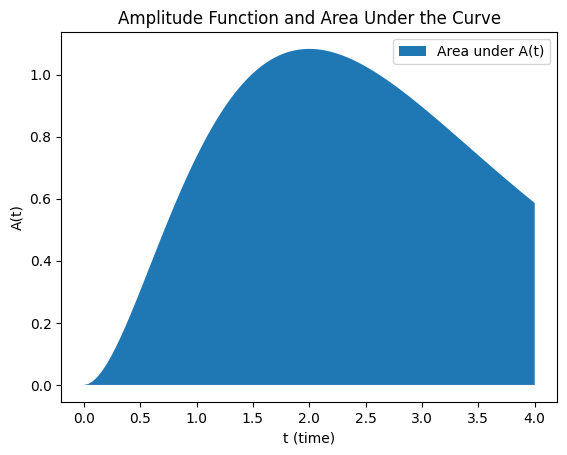

In [ ]:
#Question 2b - answer and working
x_values = np.linspace(0,4,100)
y_values = ((2*(x_values**2))*(np.exp(-x_values)))
plt.fill_between(x_values,y_values,label="Area under A(t)")

plt.title("Amplitude Function and Area Under the Curve")
plt.xlabel("t (time)")
plt.ylabel("A(t)")
plt.legend()

plt.show()

In [ ]:
#Question 2c - answer

#The integral of amplitude squared over time is often used to calculate energy.
#Therefore the integral represents the total energy that the signal carries over the time period, [0,4].

In [ ]:
#Question 3a - working

x,n = sym.symbols("x n")
x_values = np.linspace(-1,1,100)
series_FirstTenTerms = []
common_format = ((-1)**(n+1) * x**n)/n
approximations = []


for i in range(1,11):
  series_FirstTenTerms.append(common_format.subs(n,i))

for i in x_values:
  total = 0
  for j in series_FirstTenTerms:
    total = sym.N(j.subs(x,i),4) + total
  approximations.append(total)

In [ ]:
#Question 3a - answer
for i in range(len(approximations)):
  print("Approximation for "+str(x_values[i])+":   "+str(approximations[i]))

Approximation for -1.0:   -2.929
Approximation for -0.9797979797979798:   -2.736
Approximation for -0.9595959595959596:   -2.559
Approximation for -0.9393939393939394:   -2.397
Approximation for -0.9191919191919192:   -2.249
Approximation for -0.898989898989899:   -2.112
Approximation for -0.8787878787878788:   -1.986
Approximation for -0.8585858585858586:   -1.870
Approximation for -0.8383838383838383:   -1.762
Approximation for -0.8181818181818181:   -1.663
Approximation for -0.797979797979798:   -1.570
Approximation for -0.7777777777777778:   -1.483
Approximation for -0.7575757575757576:   -1.403
Approximation for -0.7373737373737373:   -1.327
Approximation for -0.7171717171717171:   -1.256
Approximation for -0.696969696969697:   -1.189
Approximation for -0.6767676767676767:   -1.126
Approximation for -0.6565656565656566:   -1.066
Approximation for -0.6363636363636364:   -1.010
Approximation for -0.6161616161616161:   -0.9565
Approximation for -0.5959595959595959:   -0.9056
Approxim

<ipython-input-31-c1fe9d5a92d3>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_values,np.log(1+np.array(x_values)),label="Actual Function")


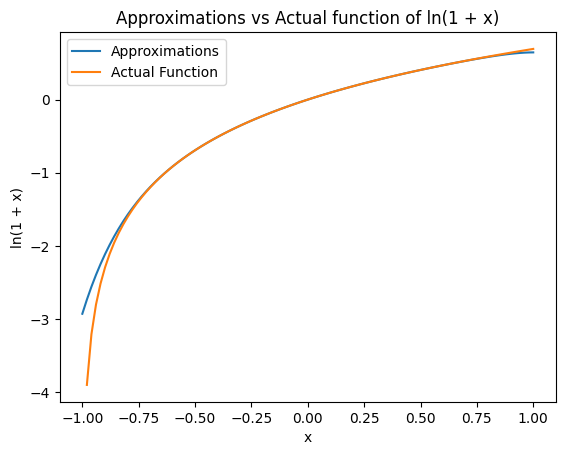

In [ ]:
#Question 3b working and answer
plt.title("Approximations vs Actual function of ln(1 + x)")
plt.plot(x_values,approximations,label="Approximations")
plt.plot(x_values,np.log(1+np.array(x_values)),label="Actual Function")
plt.xlabel("x")
plt.ylabel("ln(1 + x)")
plt.legend()
plt.show()

In [ ]:
#Question 3c - answer

#The error is equal to the difference between the value of the actual function ln(1+x) and the approximated value.
#So the computed error for each approximation increases as the value of |x| increases. Meaning for larger values of x the error is higher.

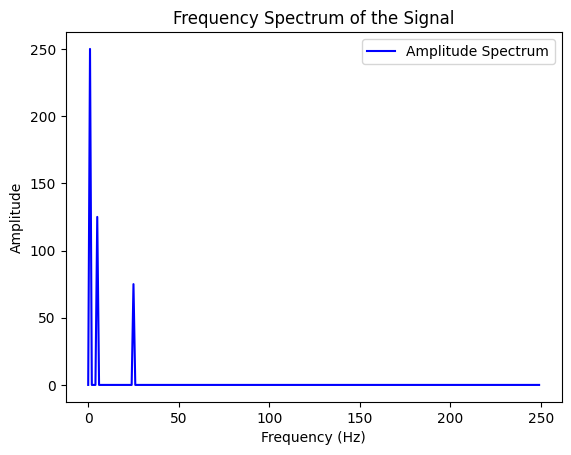

In [6]:
#Question 4a working and answer

f = 500
T = 1/f
N = 500
T_interval = np.linspace(0,1,N,endpoint = False)

s_t = np.sin(2 * np.pi * T_interval) + 0.5 * np.sin(10 * np.pi * T_interval) + 0.3 * np.sin(50 * np.pi * T_interval)

ft_result = np.fft.fft(s_t)
frequencies = np.fft.fftfreq(N,T)

amplitude_spectrum = np.abs(ft_result)

positive_freqs = frequencies[:N // 2]
positive_amplitudes = amplitude_spectrum[:N // 2]

plt.plot(positive_freqs, positive_amplitudes, color='blue', label="Amplitude Spectrum")
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

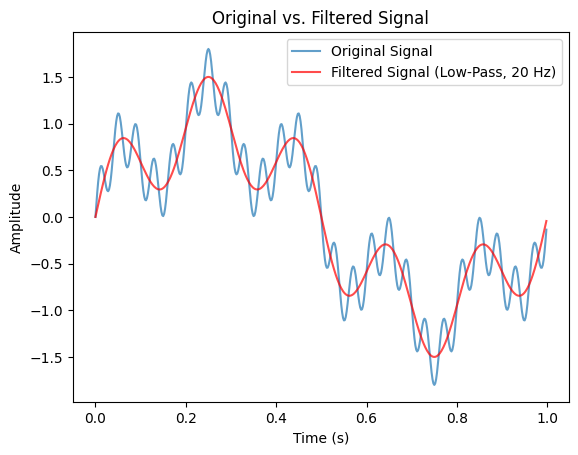

In [14]:
#Question 4b - working and answer

freq_limit = 20
low_pass_filter = np.abs(frequencies) <= freq_limit

filtered_ft_result = ft_result * low_pass_filter

filtered_signal = np.fft.ifft(filtered_ft_result).real


plt.plot(T_interval, s_t, label="Original Signal", alpha=0.7)
plt.plot(T_interval, filtered_signal, label="Filtered Signal (Low-Pass, 20 Hz)", alpha=0.7, color='red')
plt.title("Original vs. Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [13]:
#Question 4c - answer

#As you can see from the comparisons, the original signal contained high frequency variations that adds sharp variation.
#By removing frequences above 20Hz, the filtered signal contains much less noise and is much smoother as a result.

#Some other real world applications such as this noise reduction in audio processing include:

#In biomedical signals, high-frequency noise can obscure the lower-frequency patterns.
#As well as for data prepration in machine learning, this low-pass filtering can be used to remove noise from the input data.

In [13]:
#Question 5a -